In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
data_train = pd.read_csv("train.csv")
data_train.head()
data_train.shape


(14999, 9)

In [ ]:
data_train.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
a = pd.DataFrame(data_train)
a.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

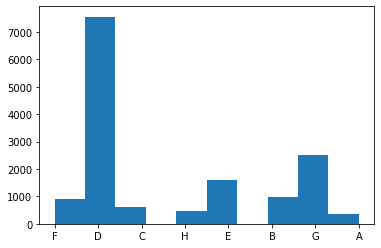

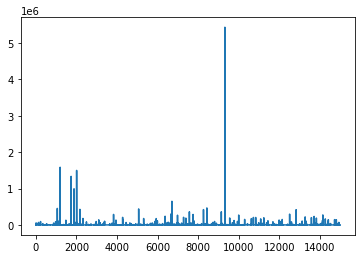

In [ ]:
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()


In [ ]:
data_train = data_train[data_train["adview"] <2000000]

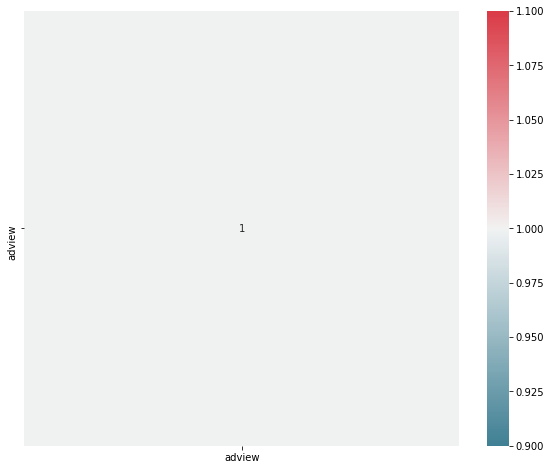

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()


In [ ]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [ ]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])


In [ ]:
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [ ]:
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
import datetime
import time
def checki(x):
  y=x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()
 

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [ ]:
corelation = data_train.corr()

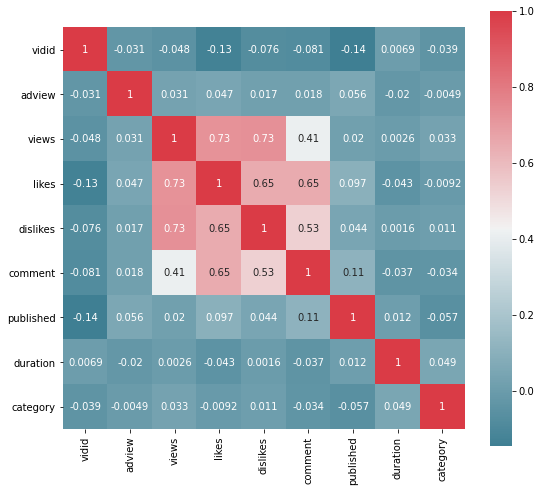

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corelation, mask=np.zeros_like(corelation, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True)
plt.show()

In [ ]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()


,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [ ]:
data_train.iloc[:,-2:8]
data_train.iloc[:,2:8].values
data_train=data_train.dropna()
data_train

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4
...,...,...,...,...,...,...,...
14994,525949,1137,83,86,1683,370,1
14995,665673,3849,156,569,1838,236,4
14996,3479,16,1,1,1053,193,2
14997,963,0,0,0,222,26,7


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [ ]:
from sklearn import metrics
mae=[0,0,0,0,0]
mse=[0,0,0,0,0]
rmse=[0,0,0,0,0]
def print_error(x_test, y_test, model_name):
  prediction = model_name.predict(x_test)
  a=metrics.mean_absolute_error(y_test, prediction)
  b=metrics.mean_squared_error(y_test, prediction)
  c=np.sqrt(b)
  print('Mean Absolute Error:', a)
  print('Mean Squared Error:', b)
  print('Root Mean Squared Error:', c)
  plt.figure(figsize=(10, 15))
  plt.scatter(range(len(prediction)), prediction, color='red', s=1)
  plt.scatter(range(len(y_test)), y_test, color='green', s=1)
  plt.show()
  return ([a,b,c])


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


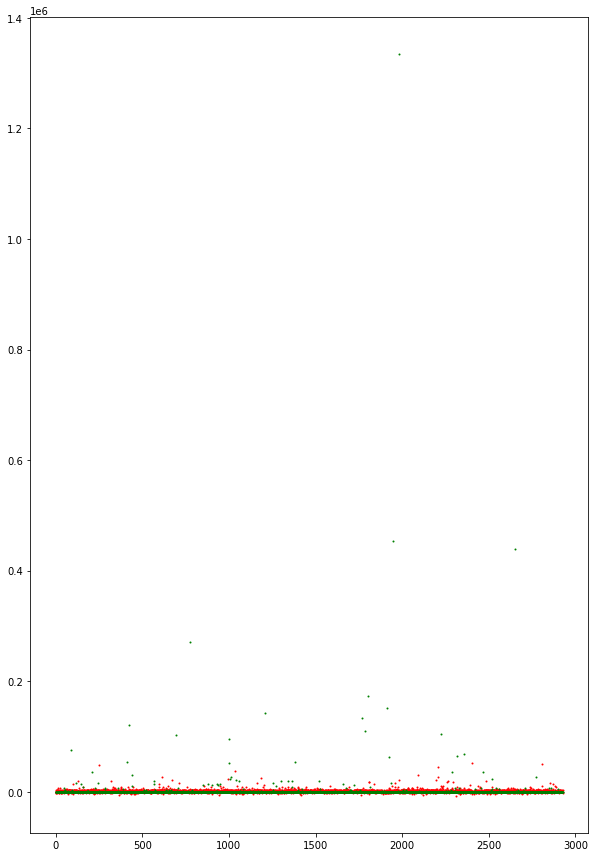

In [ ]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
mae[0],mse[0],rmse[0]=print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172
Root Mean Squared Error: 28873.617300732723


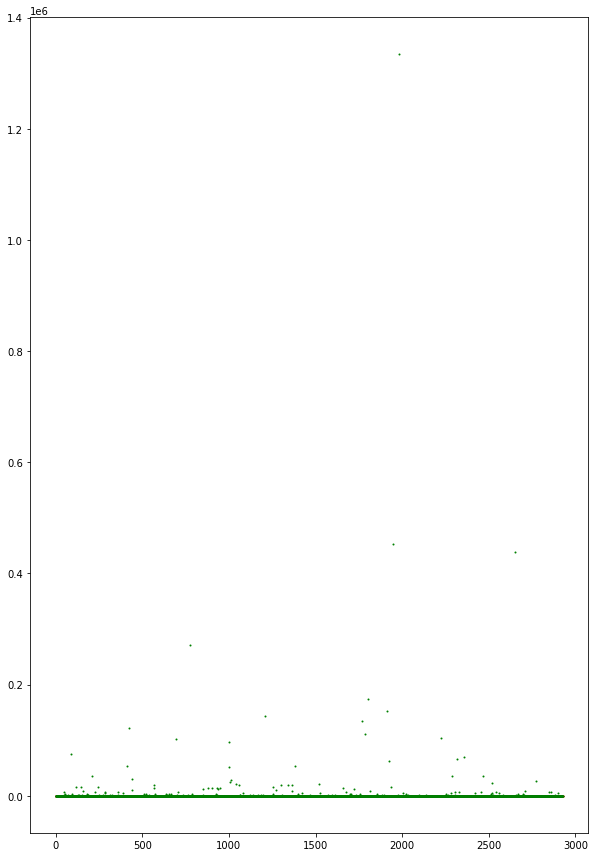

In [ ]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train.values.ravel())
mae[1],mse[1],rmse[1]=print_error(X_test,y_test, supportvector_regressor)

Mean Absolute Error: 2942.3381147540986
Mean Squared Error: 1212384107.8005464
Root Mean Squared Error: 34819.306538191515


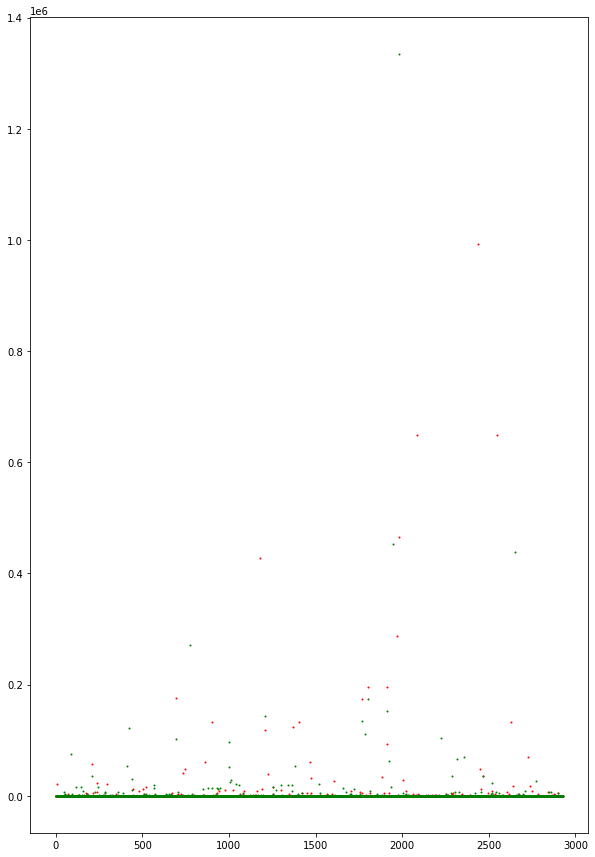

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
mae[2],mse[2],rmse[2]=print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 3372.438471272446
Mean Squared Error: 700124447.8466932
Root Mean Squared Error: 26459.8648493656


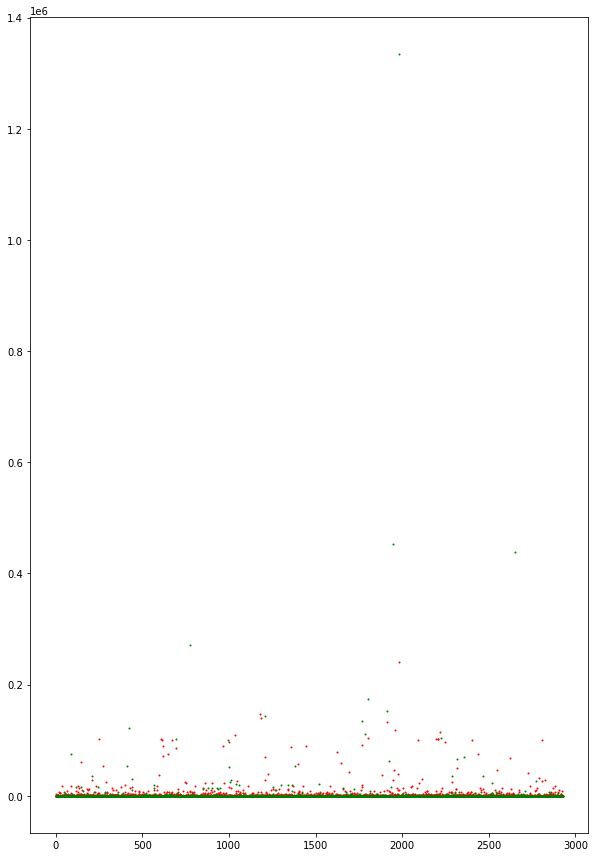

In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators = n_estimators , max_depth = max_depth, min_samples_split =  min_samples_split  , min_samples_leaf = min_samples_leaf )
random_forest.fit(X_train,y_train.values.ravel())
mae[3],mse[3],rmse[3]=print_error(X_test,y_test, random_forest)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 576958537.3488 - mean_squared_error: 576958537.3488
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 631800606.6076 - mean_squared_error: 631800606.6076
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 364844520.5594 - mean_squared_error: 364844520.5594
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 566502782.5845 - mean_squared_error: 566502782.5845
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 420850321.3351 - mean_squared_error: 420850321.3351
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 1132545630.9382 - mean_squared_error: 1132545630.9382
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 506565101.3500 - mean_squared_error: 506565101.3500
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 1085036701.4906 - mean_squared_err

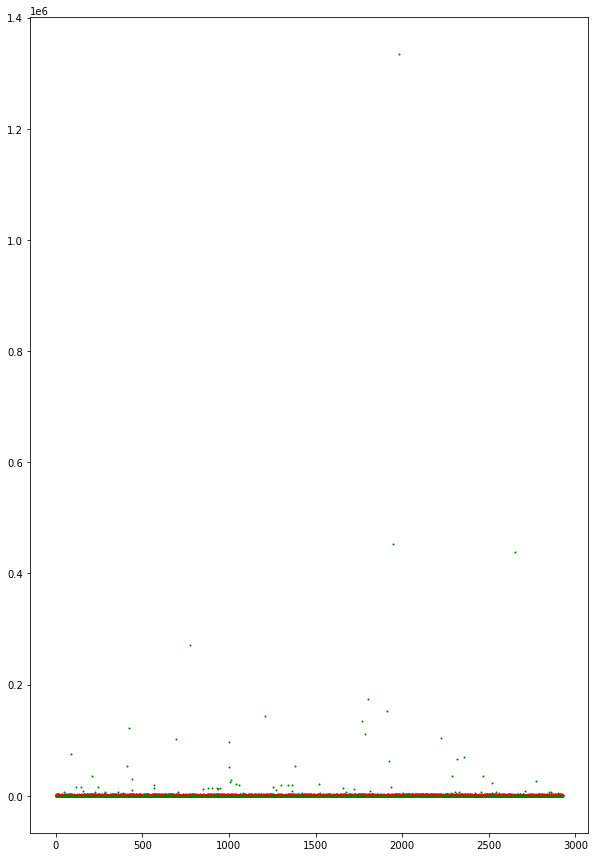

In [ ]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
mae[4],mse[4],rmse[4]=print_error(X_test,y_test,ann)

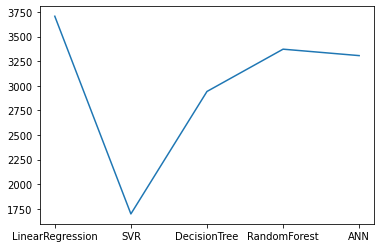

In [ ]:
plt.plot(["LinearRegression","SVR","DecisionTree","RandomForest","ANN"],mae)
plt.show()

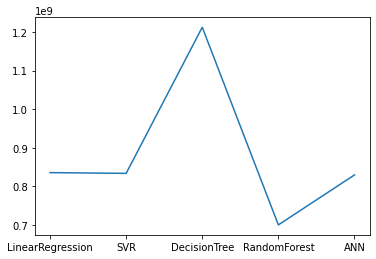

In [ ]:
plt.plot(["LinearRegression","SVR","DecisionTree","RandomForest","ANN"],mse)
plt.show()

In [ ]:
import joblib
joblib.dump(supportvector_regressor, "SVR_youtubeadview.pkl")
ann.save("ann_youtubeadview.h5")

In [ ]:
test = pd.read_csv('train.csv')
test

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [ ]:
test.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
test.tail()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G
14998,VID_8534,1,15212,22,5,4,2016-02-19,PT1M1S,D


In [ ]:
test.shape

(14999, 9)

In [ ]:
test.describe

<bound method NDFrame.describe of            vidid  adview    views likes  ... comment   published duration category
0      VID_18655      40  1031602  8523  ...    1095  2016-09-14  PT7M37S        F
1      VID_14135       2     1707    56  ...       6  2016-10-01  PT9M30S        D
2       VID_2187       1     2023    25  ...       2  2016-07-02  PT2M16S        C
3      VID_23096       6   620860   777  ...     153  2016-07-27  PT4M22S        H
4      VID_10175       1      666     1  ...       0  2016-06-29    PT31S        D
...          ...     ...      ...   ...  ...     ...         ...      ...      ...
14994     VID_31       2   525949  1137  ...      86  2015-05-18  PT6M10S        A
14995   VID_5861       1   665673  3849  ...     569  2015-10-20  PT3M56S        D
14996    VID_805       4     3479    16  ...       1  2013-08-23  PT3M13S        B
14997  VID_19843       1      963     0  ...       0  2010-10-02    PT26S        G
14998   VID_8534       1    15212    22  ...       4 

In [ ]:
test.isnull().any()

vidid        False
adview       False
views        False
likes        False
dislikes     False
comment      False
published    False
duration     False
category     False
dtype: bool

In [ ]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test["category"]=test["category"].map(category)
test

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7


In [ ]:
test=test[test.views!='F']
test=test[test.likes!='F']
test=test[test.dislikes!='F']
test=test[test.comment!='F']
test

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7


In [ ]:
test["views"] = pd.to_numeric(test["views"])
test["comment"] = pd.to_numeric(test["comment"])
test["likes"] = pd.to_numeric(test["likes"])
test["dislikes"] = pd.to_numeric(test["dislikes"])
test["adview"]=pd.to_numeric(test["adview"])
column_vidid_2=test['vidid']
test

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7


In [ ]:
from sklearn.preprocessing import LabelEncoder
test['duration']=LabelEncoder().fit_transform(test['duration'])
test['vidid']=LabelEncoder().fit_transform(test['vidid'])
test['published']=LabelEncoder().fit_transform(test['published'])
test

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949,1137,83,86,1683,2833,1
14995,11758,1,665673,3849,156,569,1838,2257,4
14996,13263,4,3479,16,1,1,1053,2210,2
14997,6736,1,963,0,0,0,222,1364,7


In [ ]:
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
  train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

test["duration"]=time1
test.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,449.0,6
1,2741,2,1707,56,2,6,2185,389.0,4
2,8138,1,2023,25,0,2,2094,2274.0,3
3,9005,6,620860,777,161,153,2119,595.0,8
4,122,1,666,1,0,0,2091,188.0,4


In [ ]:
test.iloc[:,-2:8]
test.iloc[:,2:8].values
test=test.dropna()
test=test.drop(["adview"],axis=1)
test=test.drop(["vidid"],axis=1)
test

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,449.0,6
1,1707,56,2,6,2185,389.0,4
2,2023,25,0,2,2094,2274.0,3
3,620860,777,161,153,2119,595.0,8
4,666,1,0,0,2091,188.0,4
...,...,...,...,...,...,...,...
8759,1909235,2939,365,326,2030,194.0,7
8760,140562,1876,105,111,2339,8315.0,4
8761,3275107,1031,921,134,1752,434.0,4
8762,38893,671,14,57,1143,195.0,4


In [ ]:
import joblib
classifier = joblib.load("SVR_youtubeadview.pkl")
prediction = classifier.predict(test)

In [ ]:
prediction

array([3.54851214, 3.54851214, 3.54851214, ..., 3.54851214, 3.54851214,
       3.54851214])

In [ ]:
np.savetxt('Prediction.csv',prediction,delimiter=',')